# **Titanic EDA**

## About Dataset

>- **`Data Source`**\
> Use sns.load_dataset(‘titanic’) command from Seaborn Library to use the titanic dataset



## **Step 1: Import Necessary Libraries and Load the Dataset**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = sns.load_dataset('titanic')

## **Step 2: View the First Few Rows of the Dataset**

In [59]:
# Display the first few rows of the dataset
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## **Step 3: Get Basic Information About the Dataset**

In [60]:
# Get basic information about the dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp       parch        f

## **Step 4: Check for Missing Values**

In [61]:
# Check for missing values
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


## **Step 4: Check for Missing Values**
In the Titanic dataset, the main columns with missing values are age, deck, embarked, and embarked_town. Here’s how you can handle them:

In [62]:
# Remove the 'deck' column as it has many missing values
df = df.drop('deck', axis=1)

# Fill missing 'age' values with the median age
df['age'] = df['age'].fillna(df['age'].median())

# Drop rows with missing 'embarked' values
df = df.dropna(subset=['embarked'])

# Drop 'embarked_town' as it is not crucial for analysis and has missing values
df = df.drop('embark_town', axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


## **Step 6: Data Visualization**
Distribution of Age

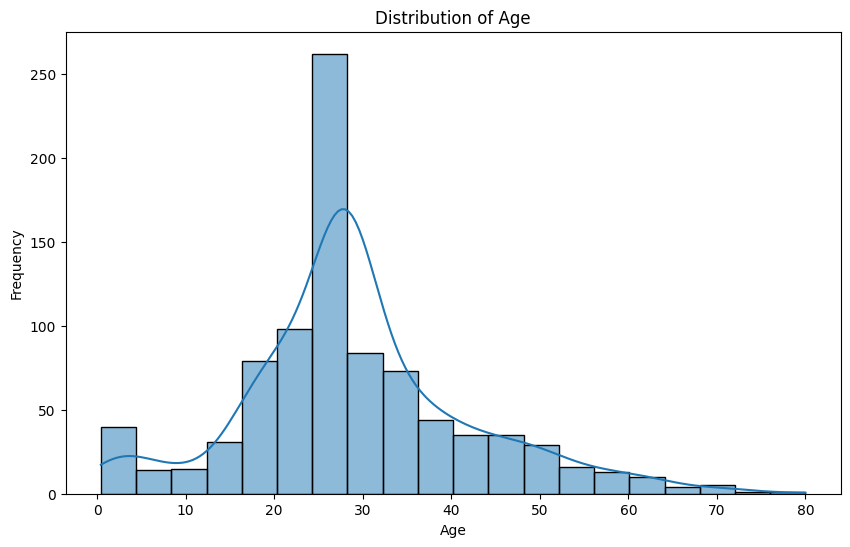

In [63]:
# Histogram of age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Survival Rate by Sex

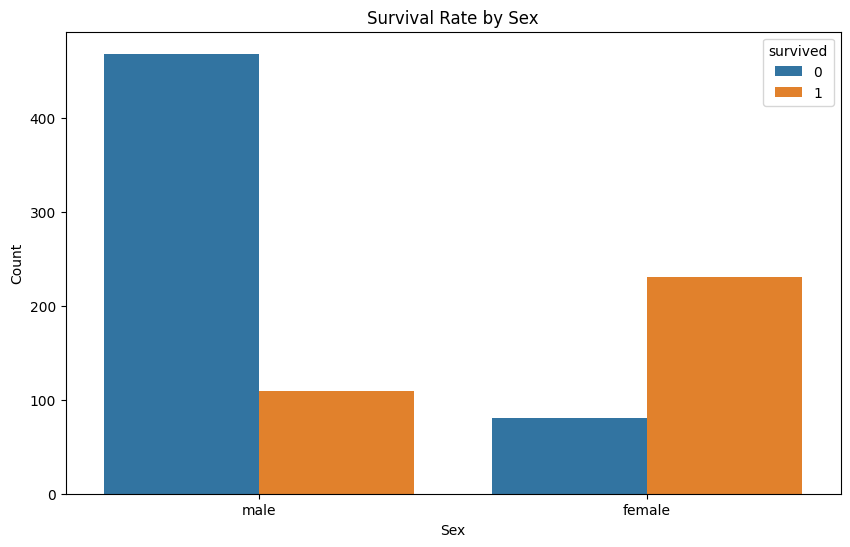

In [64]:
# Bar plot of survival rate by sex
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Survival Rate by Passenger Class

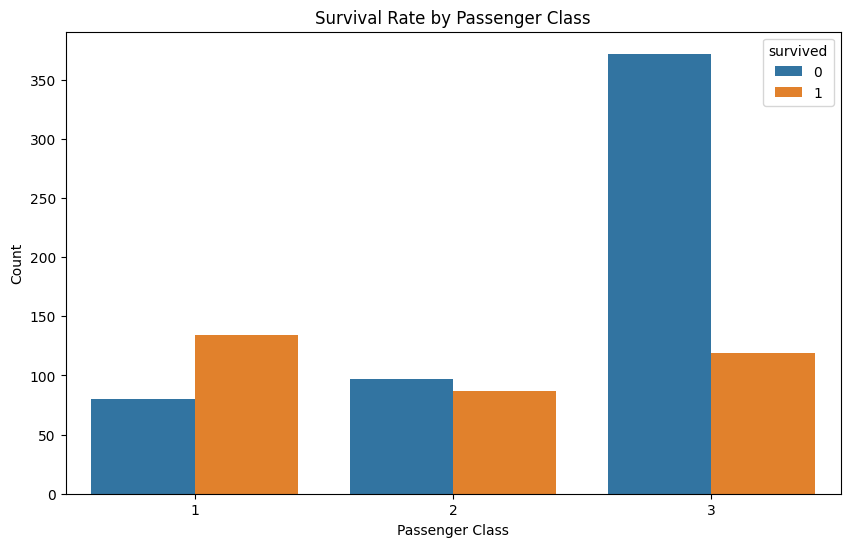

In [65]:
# Bar plot of survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

Box Plot of Fare by Passenger Class

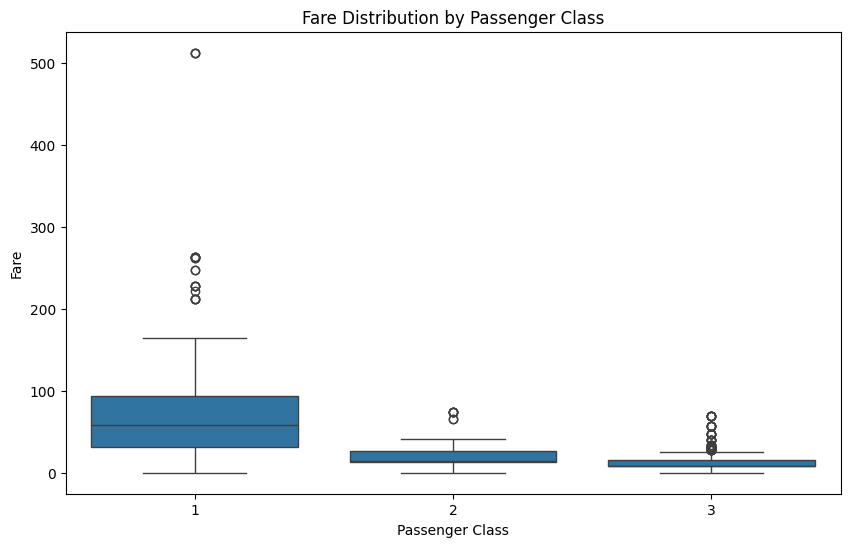

In [66]:
# Box plot of fare by passenger class
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

Correlation Matrix

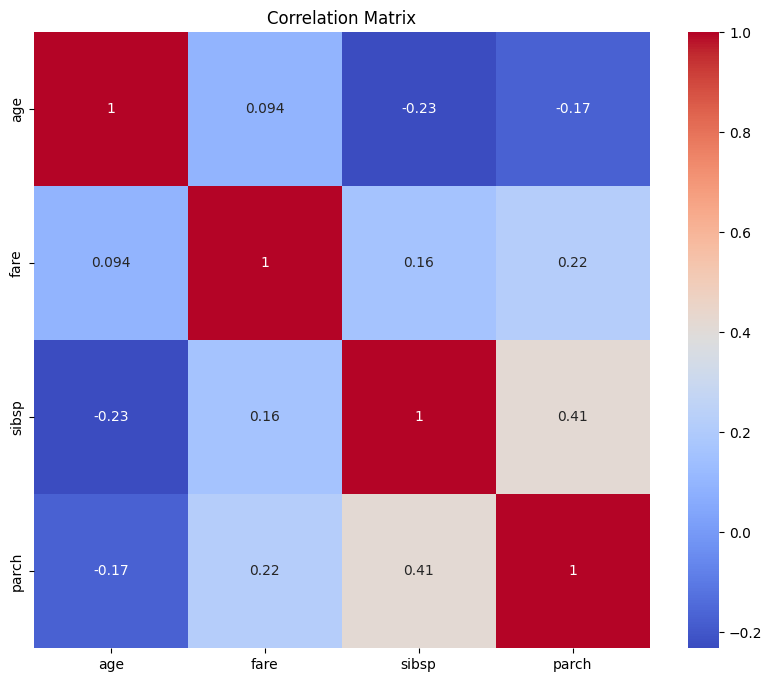

In [67]:
# Correlation matrix
corr_matrix = df[['age', 'fare', 'sibsp', 'parch']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## **Step 7: Additional Insights**
Average Family Size

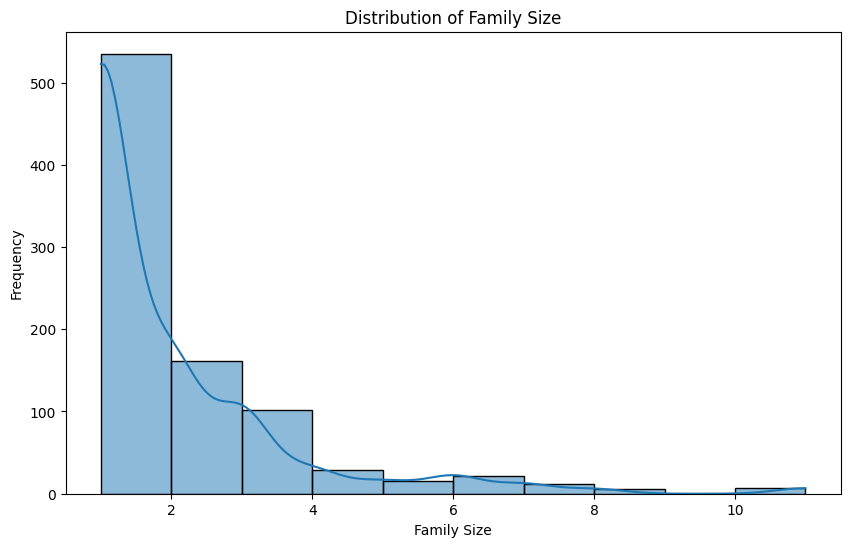

In [68]:
# Create a new column for family size
df['family_size'] = df['sibsp'] + df['parch'] + 1

# Plot the distribution of family size
plt.figure(figsize=(10, 6))
sns.histplot(df['family_size'], bins=10, kde=True)
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()